# Group 10 Project 2

**Group member name:**

Zihao Yan (2865415)\
He Mi (2863617)\
Mei-Yu Liao (2864646)\
Yanyi Luo (2863318)

# **A. Literature Review**
### Motivation

The world cannot function well without face masks due to the current Covid-19 pandemic, despite that President Trump has mocked the usage of it multiple times[1]. Recently, Europe is experiencing a second wave of newly diagnosed cases, and certainly other places such as the USA are still struggling with the controll of the crisis, with the case rate and death rate climbing steedyly [2]. According to the New York Times, new restrictions were imposed in Europe now to help slow down the spread of the virus, and mandatory wearing of face masks in public places was one of them[3]. Wearing face masks is considered as one of the most efficient ways to prevent the infection from the coronavirus, as The World Health Organization and the U.S. Centers for Disease Control and Prevention (CDC) included this method as one of their recommendations[4]. 
For retail businesses like shops and restaurants, how to survive this pandemic becomes a erging problem. Not only to enforce the employee awareness of wearing masks, but how to request the customers to follow the rules is a serious challenge[5]. However, it would become another expense for business struggling to have a department to monitor whether all the customers are wearing a mask before entering stores and make relevant action if customers refuse to do so. This fact raised our attention and thus we want to solve this pain. Nowadays, facial recognition technology has been introduced into several industries and they performed better than expected. The surveillance systems in ATMs of banks help record people’s facial features to assist the tracking of the money[6]. Same with those that require extra security such as casino and gambling industries, where they use facial scanning technology to monitor cheating or abnormal actions[7]. And smartphone fans may have noticed, that with Apple’s adoption of Face ID to unlock the phones, the technology has become mature and advanced[8]. The facial recognization system to monitor if people are wearing masks or not can definitely be a huge help for current occasion, and industries including retails, public transportation systems, hospitals, and governments would be benefit from this project[9].
 


### Dataset
In this case we created our own dataset. We used Google extension and Github repository to scratch the photos on google searching result and divided them into two groups: people with masks on and people without masks on, and they contained 453 and 974 photos respectively. Our goal is to use DL architectures to classify them accurately into two categories.


### Our Approach
Convolutional neural networks are most commonly applied to analyzing visual imagery[10], so it would be perfect for developing our classification model. A ConvNet is able to successfully extract the Spatial and Temporal differences in an image through the layers of relevant filters. Due to the reduction in the number of parameters involved and reusability of weights, the most important features were captured, and the model can understand the sophistication of the image better[11]. 

After downloading the photos and stored it on Google drive, we performed data preprocessing by rescaling the image and splitting it into training set and test set. This time we build a baseline CNN model. Since we only have 453 pictures with masks and 974 pictures without masks, we use data augmentation in order to enlarge our dataset and avoid overfitting. Image augmentation is proved to be effient in improving the performance of CNN for image classification, and by using this method, the accuarcy of a classification model has significant improvement[12]. We build two CNN with pre-trained convolution base - MobileNetV2. The first pre-trained model includes drop-out in its fully-connected layer. The second pre-trained model's fully-connected drop-out was removed and we introduced early-stopping. We want to see if there's any improvement by changing the model architecture.

# **B. Data Gathering**
**Source**

We used a code from Github to download images for people with and without mask. Moreover, we used Google extension "Imageye" for more images. With the conbination of the two tools, we get 453 and 974 photos for people with and without masks for our models. The codes that helped us gather images are listed here:
https://colab.research.google.com/drive/1h3zL0wxubMO6LNta8potTbDWau6HIKlF?authuser=1



# **C. Data Preprocessing**

### 1.Setup environment and mount the drive

In [ ]:
import numpy as np
import pandas as pd
import glob
import os
from keras import layers
from keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import argparse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.Reading and Preprocessing Data

In [ ]:
imagePaths = glob.glob("/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning - Group10/Project 2/Datasets/*/*")
data = []
labels = []

In [ ]:
#imagePaths

In [ ]:
for imagePath in imagePaths:
    #Split the path name into a pair head and tail. 
    label = imagePath.split(os.path.sep)[-2] #-2means title file name -1 means jpg name
    image = load_img(imagePath, target_size=(200, 200)) #update
    image = img_to_array(image)
#Preprocessed numpy.array or a tf.Tensor with type float32.
#The images are converted from RGB to BGR, then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)

In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
data.shape

(2498, 200, 200, 3)

In [ ]:
labels.shape

(2498,)

In [ ]:
labels[0]

'mask'

In [ ]:
labels[500]

'nomask'

In [ ]:
#convert multi-class labels to binary labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
labels[0]

array([1., 0.], dtype=float32)

### 3.Train and Test Split of data

In [ ]:
traindata, testdata, trainlabels, testlabels = train_test_split(data, labels, test_size = 0.2)

In [ ]:
print(traindata.shape)
print(testdata.shape)
print(trainlabels.shape)
print(testlabels.shape)

(1998, 200, 200, 3)
(500, 200, 200, 3)
(1998, 2)
(500, 2)


# **D. Fit the Model**

### D-1.Original Model

In [ ]:
model = Sequential()
model.add(Conv2D(200, (3, 3), activation='relu',
                 input_shape = data.shape[1:]))
#input_shape = data.shape[1:] can replace (200,200,3)
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 200)     5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dropout (Dropout)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                1

In [ ]:
#autoencoder.summary()

In [ ]:
#model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#binary_crossentropy
#categorical_crossentropy
#model.compile(optimizer='Adam',loss="mse", metrics=['mae'])

In [ ]:
checkpoint = ModelCheckpoint('model/m-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True)

In [ ]:
import time
start = time.time()
#history = model.fit(traindata, trainlabels, epochs = EPOCHS,  callbacks = [checkpoint], validation_split = 0.2)
history = model.fit(traindata, trainlabels, epochs = 10, validation_split = 0.2)
end = time.time()
print(end - start)

Epoch 1/10
50/50 [==============================] - 539s 11s/step - loss: 0.9428 - accuracy: 0.6101 - val_loss: 0.6249 - val_accuracy: 0.6375
Epoch 2/10
50/50 [==============================] - 539s 11s/step - loss: 0.5985 - accuracy: 0.6721 - val_loss: 0.5756 - val_accuracy: 0.7125
Epoch 3/10
50/50 [==============================] - 538s 11s/step - loss: 0.4994 - accuracy: 0.7728 - val_loss: 0.5218 - val_accuracy: 0.7575
Epoch 4/10
50/50 [==============================] - 535s 11s/step - loss: 0.3986 - accuracy: 0.8342 - val_loss: 0.4368 - val_accuracy: 0.7975
Epoch 5/10
50/50 [==============================] - 533s 11s/step - loss: 0.3267 - accuracy: 0.8617 - val_loss: 0.4096 - val_accuracy: 0.8325
Epoch 6/10
50/50 [==============================] - 532s 11s/step - loss: 0.2637 - accuracy: 0.8874 - val_loss: 0.4228 - val_accuracy: 0.8375
Epoch 7/10
50/50 [==============================] - 535s 11s/step - loss: 0.2161 - accuracy: 0.9168 - val_loss: 0.3826 - val_accuracy: 0.8675
Epoch 

In [ ]:
#model.save('')

### D-1.2.Predictions Condition 

In [ ]:
print("[INFO] Evaluating Model")
predIdxs = model.predict(testdata, batch_size=30)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testlabels.argmax(axis=1), predIdxs, target_names=lb.classes_))
print("[INFO] saving mask detector model...")
model.save_weights("model.h5")

[INFO] Evaluating Model
              precision    recall  f1-score   support

        mask       0.90      0.73      0.81       199
      nomask       0.84      0.94      0.89       301

    accuracy                           0.86       500
   macro avg       0.87      0.84      0.85       500
weighted avg       0.86      0.86      0.86       500

[INFO] saving mask detector model...


### D-1.3.Loss and Accuracy

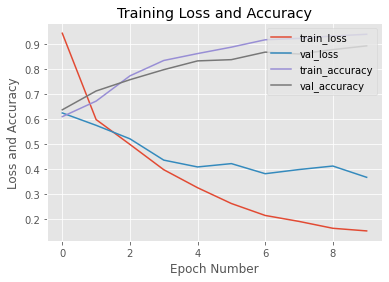

In [ ]:
N = 10
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Loss and Accuracy")
plt.legend(loc="upper right")

### D-2.Fit a Pre-trainined Convnet(MobileNetV2)

Since the plot is showing sign of overfitting, we tried to imply another model "MobileNetV2" to see if it can have better results. In  the article, the MobileNetV2 is introduced and it shows overall higher accuracies on image classifications [14].

In [ ]:
# set masks dataset path
Masks_path = '/content/drive/Shared drives/OPIM 5509 Introduction to Deep Learning - Group10/Project 2/Datasets'
# masks and nomasks images are seperated into two folders
Categories = ["mask", "nomask"]

In [ ]:
# extract the images from the two folders and store them into two lists
data = []
labels = []

for category in Categories:
    path = os.path.join(Masks_path, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(255, 255))
    	image = img_to_array(image)
    	image = preprocess_input(image) # preprocess_input is used for MobileNet model 

    	data.append(image)
    	labels.append(category)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# convert target into 0 and 1 Mask=0, no mask =1
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
# transform into numpy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
# split the dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    stratify=labels, 
                                                    random_state=10)

In [ ]:
# check the shape of subsets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1152, 255, 255, 3)
(288, 255, 255, 3)
(1152, 1)
(288, 1)


In [ ]:
# load the MobileNetV2 network, ensuring the head FC layer sets are left off
conv_base = MobileNetV2(weights="imagenet", 
                        include_top=False, 
                        input_shape=(255, 255, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# check the model architecture
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
# construct the head of the model that will be placed on top of the the base model
headModel = conv_base.output
headModel = MaxPooling2D((7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [ ]:
# construct the training image generator for data augmentation
augmentation = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
# place the head FC model on top of the base model (this will become the actual model we will train)
model = Model(inputs=conv_base.input, outputs=headModel)

In [ ]:
# loop over all layers in the base model and freeze them so they will not be updated during the first training process
for layer in conv_base.layers:
	layer.trainable = False

In [ ]:
# initialize the initial learning rate, batch size and epochs. 
INIT_LR = 1e-4
BS = 32
EPOCHS=20
# compile our model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
# train the head of the network
history = model.fit(augmentation.flow(x_train, y_train, batch_size=BS),
                    steps_per_epoch=len(x_train) // BS,
                    validation_data=(x_test, y_test),
                    validation_steps=len(x_test) // BS,
                    epochs=20)

Epoch 1/20
36/36 [==============================] - 76s 2s/step - loss: 1.6890 - accuracy: 0.6033 - val_loss: 0.5619 - val_accuracy: 0.7500
Epoch 2/20
36/36 [==============================] - 74s 2s/step - loss: 0.9420 - accuracy: 0.7049 - val_loss: 0.3550 - val_accuracy: 0.8542
Epoch 3/20
36/36 [==============================] - 74s 2s/step - loss: 0.7389 - accuracy: 0.7387 - val_loss: 0.2928 - val_accuracy: 0.8854
Epoch 4/20
36/36 [==============================] - 74s 2s/step - loss: 0.5615 - accuracy: 0.7943 - val_loss: 0.2564 - val_accuracy: 0.8958
Epoch 5/20
36/36 [==============================] - 74s 2s/step - loss: 0.4693 - accuracy: 0.8090 - val_loss: 0.2683 - val_accuracy: 0.8924
Epoch 6/20
36/36 [==============================] - 74s 2s/step - loss: 0.4622 - accuracy: 0.8116 - val_loss: 0.2401 - val_accuracy: 0.9167
Epoch 7/20
36/36 [==============================] - 74s 2s/step - loss: 0.4192 - accuracy: 0.8264 - val_loss: 0.2471 - val_accuracy: 0.9097
Epoch 8/20
36/36 [==

### D-2.2.Predictions Condition 

In [ ]:
# make predictions on the testing set
preds = model.predict(x_test)

In [ ]:
preds = np.round(model.predict(x_test),0)


In [ ]:
# show a nicely formatted classification report (Notice that 0=mask, 1= no mask)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        93
           1       0.94      0.97      0.95       195

    accuracy                           0.93       288
   macro avg       0.93      0.91      0.92       288
weighted avg       0.93      0.93      0.93       288



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 80,  13],
       [  6, 189]])

### D-2.3.Loss and Accuracy

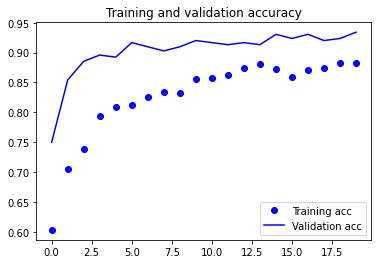

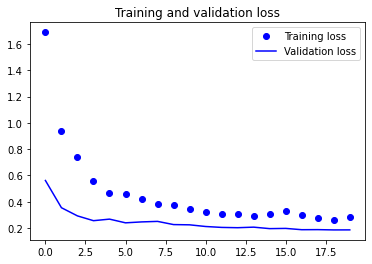

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# serialize the model to disk
# model.save("mask_detector.model", save_format="h5")

### D-3.Second Model Adjustment

Based on the second model, we want to see if we can tweak the elements in the model to get better performance.

In [ ]:
# construct the head of the model that will be placed on top of the the base model
# delete the dropout to see if the result will change
headModel2 = conv_base.output
headModel2 = MaxPooling2D((7, 7))(headModel2)
headModel2 = Flatten(name="flatten")(headModel2)
headModel2 = Dense(128, activation="relu")(headModel2)
headModel2 = Dense(1, activation="sigmoid")(headModel2)

In [ ]:
# construct the training image generator for data augmentation
augmentation = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [ ]:
# place the head FC model on top of the base model (this will become the actual model we will train)
model2 = Model(inputs=conv_base.input, outputs=headModel2)

In [ ]:
# loop over all layers in the base model and freeze them so they will not be updated during the first training process
for layer in conv_base.layers:
	layer.trainable = False

In [ ]:
# initialize the initial learning rate and batch size
INIT_LR = 1e-4
BS = 64
EPOCHS=15
# compile our model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model2.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
# train the head of the network, add
from keras.callbacks import EarlyStopping 
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=20,
                   restore_best_weights = True)
history = model2.fit(augmentation.flow(x_train, y_train, batch_size=BS),
                    steps_per_epoch=len(x_train) // BS,
                    validation_data=(x_test, y_test),
                    validation_steps=len(x_test) // BS,
                    epochs=15, callbacks= [es])

Epoch 1/15
18/18 [==============================] - 72s 4s/step - loss: 1.0650 - accuracy: 0.6259 - val_loss: 0.7087 - val_accuracy: 0.6597
Epoch 2/15
18/18 [==============================] - 71s 4s/step - loss: 0.5937 - accuracy: 0.7543 - val_loss: 0.4581 - val_accuracy: 0.8056
Epoch 3/15
18/18 [==============================] - 71s 4s/step - loss: 0.3914 - accuracy: 0.8194 - val_loss: 0.3675 - val_accuracy: 0.8611
Epoch 4/15
18/18 [==============================] - 71s 4s/step - loss: 0.3512 - accuracy: 0.8403 - val_loss: 0.3721 - val_accuracy: 0.8472
Epoch 5/15
18/18 [==============================] - 72s 4s/step - loss: 0.3087 - accuracy: 0.8568 - val_loss: 0.3272 - val_accuracy: 0.8785
Epoch 6/15
18/18 [==============================] - 71s 4s/step - loss: 0.2484 - accuracy: 0.8958 - val_loss: 0.2991 - val_accuracy: 0.8924
Epoch 7/15
18/18 [==============================] - 71s 4s/step - loss: 0.2443 - accuracy: 0.8898 - val_loss: 0.3486 - val_accuracy: 0.8646
Epoch 8/15
18/18 [==

### D-3.2.Predictions Condition 

In [ ]:
# make predictions on the testing set
preds = model2.predict(x_test)

In [ ]:
preds = np.round(model2.predict(x_test),0)

In [ ]:
# show a nicely formatted classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        93
           1       0.92      0.96      0.94       195

    accuracy                           0.92       288
   macro avg       0.91      0.89      0.90       288
weighted avg       0.92      0.92      0.92       288



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 77,  16],
       [  8, 187]])

### D-3.3.Loss and Accuracy

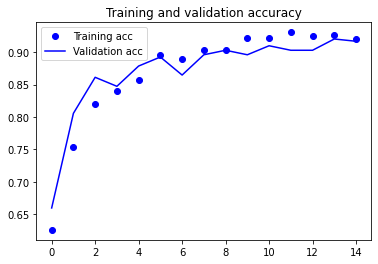

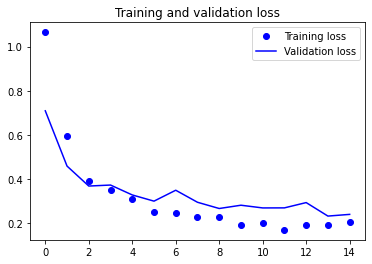

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **E. Results and Discussion**
With 2 Convolutional Network, we get to improve our model in the sencond model


*   Training accuracy and validation accuracy changed from 0.94 and 0.89 to 0.88 and 0.93 to 0.92 and 0.92, and the confusion matrix improved. We believe that the first model has overfitted and thus the second and the third model perform better. The third model without dropout still has high accuracies, but the accuracy of validation dropped about 0.01, thus the second model is still slightly better than the third one. First model shows a better prediction on people wearing a mask, while the second and the third models shows higher accuracies on predicting people without mask, which are our preferred results.
*   With the augmentation added to our model, it probably contributes to the reason why the second and the third models improved. The high accuracies of our model shows that this approach can serve the need of local stores or business when monitoring people with or without masks if apply the models with simultaneous monitor camera system, thus solving the challenging problem industries are facing currently.
*   As the Covid-19 pandemic ongoing, our model can serve as an important tool to promote the mask wearing policy, and can also be combined with alarming system to notify people to wear mask when the volume of popularity of a place rise, such as in subways or in shopping malls.



# **F. Conclusion**

*  We scratched data from google image using codes from github, combining the Google extension "Imageye", we scraped total of 453 and 974 images of people with and without masks.
* Using invertebrate, we reshaped the images and assign their labels, and put them into arrays to better fit into our neural network models, in which 0s are people with masks and 1s are people without masks, since we want to target on people who **DON'T** wear masks.
* We fit 3 convilutional neural network, with the second one added augmentation, we get a better prediction of classifying people with or without mask, with accuracy of training and validation raised from 0.94 and 0.89 to 0.88 and 0.93 to 0.92 and 0.92, and an improvement on confusion matrix. The best model is the second model with highest accuracy on validation and better confusion matrix.
* Since we only got a small dataset, how to retain this high accuracy with larger data(for example when using store camera to monitor mask protection) could be next step.
* For future implementation, combining our model with monitor system and alarming system in massive transportation area or shopping malls will help governments and local business control public health during the Covid-19 pandemic, or flu season observation.

# **G.References**


[1] "Trump, downplaying virus, has mocked wearing masks for months",
ByLibby Cathey, abc news. Available from <https://abcnews.go.com/Politics/trump-downplaying-virus-mocked-wearing-masks-months/story?id=73392694>

[2]"Oct. 28 update on COVID-19 in MN: Hospitalizations, cases, deaths climbing steeply", St. Paul, MPR News, Available from<https://www.mprnews.org/story/2020/10/28/latest-on-covid19-in-mn>

[3]"Europe, Which Thought It Had the Virus Tamed, Faces a Resurgence",Mark Landler, New York Times. Available from <https://www.nytimes.com/2020/10/14/world/europe/europe-coronavirus.html>

[4]"COVID-19: How much protection do face masks offer?", Mayo Clinic Staff.Available from <https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/coronavirus-mask/art-20485449>

[5]"With wave of mask requirements, Walmart and other retailers face challenge: How to enforce the rules", Melissa Repko, CNBC. Available from <https://www.cnbc.com/2020/07/17/with-mask-requirements-retailers-face-challenge-enforcing-the-rules.html>

[6]“The Mask Detection Technology for Occluded Face Analysis in the Surveillance System”, June 2005,Journal of Forensic Sciences 50(3):593-601 Available from <https://www.researchgate.net/publication/7810277_The_Mask_Detection_Technology_for_Occluded_Face_Analysis_in_the_Surveillance_System>

[7]"Like It Or Not Facial Recognition Is Already Here. These Are The Industries It Will Transform First",April 10, 2019. Available from <https://www.cbinsights.com/research/facial-recognition-disrupting-industries/>

[8]"About Face ID advanced technology", Apple. Available from <https://support.apple.com/en-us/HT208108>

[9]"Face Mask Detection Comply with C-19 regulations", SightCorp. Available from <https://sightcorp.com/face-mask-detection/>

[10]"Convolutional neural network", Wikipedia. Available from <https://en.wikipedia.org/wiki/Convolutional_neural_network>

[11]"A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way",
Sumit Saha, Dec 16,2018. Available from <https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53>

[12]"GAN-based Synthetic Medical Image Augmentation for increased CNN Performance
in Liver Lesion Classification", Maayan Frid-Adar, Idit Diamant, Eyal Klang, Michal Amitai, Jacob Goldberger,and Hayit Greenspan, Member, IEEE. Available from <https://arxiv.org/pdf/1803.01229.pdf?source=post_page--------------------------->

[13]"Face Mask Detection algorithm using Convolutional Neural Network — AI — Computer Vision",Tom Staite. Available from<https://medium.com/@tomstaite1/face-mask-detection-algorithm-using-convolutional-neural-network-ai-computer-vision-15f08988533e>

[14] "Review: MobileNetV2 — Light Weight Model (Image Classification)", Sik-Ho Tsang, towards DataScience. Available from <https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c>




